In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os import path
from math import ceil
from scanpy import read_h5ad
import squidpy as sq
import scanpy as sc
from sklearn import metrics
import sys
import seaborn as sns
sys.path.append("/Users/user/CellPie/CellPie/") # go to parent dir
import cellpie_main as cp
from cellpie_main import intNMF

In [2]:
random_state=123

In [3]:
histo_2 = pd.read_csv('Histology_Visium_FFPE_Human_Prostate_Cancer_cloupe.csv').dropna()
histo_2.index = histo_2['Barcode']

In [ ]:
%%sh
mkdir -p invasive_prostate_visium
pushd invasive_prostate_visium/
wget https://cf.10xgenomics.com/samples/spatial-exp/1.3.0/Visium_FFPE_Human_Prostate_Cancer/Visium_FFPE_Human_Prostate_Cancer_image.tif
wget https://cf.10xgenomics.com/samples/spatial-exp/1.3.0/Visium_FFPE_Human_Prostate_Cancer/Visium_FFPE_Human_Prostate_Cancer_filtered_feature_bc_matrix.h5
wget https://cf.10xgenomics.com/samples/spatial-exp/1.3.0/Visium_FFPE_Human_Prostate_Cancer/Visium_FFPE_Human_Prostate_Cancer_spatial.tar.gz
tar -xzf Visium_FFPE_Human_Prostate_Cancer_spatial.tar.gz
rm Visium_FFPE_Human_Prostate_Cancer_spatial.tar.gz
popd

In [ ]:
# read ST data
adata = sc.read_visium(path = 'invasive_prostate_visium/', 
                       count_file='Visium_FFPE_Human_Prostate_Cancer_filtered_feature_bc_matrix.h5',                   
                       load_images=True)
adata.var_names_make_unique()
adata.var['SYMBOL'] = adata.var_names

In [ ]:
adata = adata[adata.obs_names.isin(histo_2['Barcode']),:]

In [ ]:
scale_range = np.arange(0.1,3,0.1)

In [ ]:
from feature_extr import extract_features
features = extract_features(adata,img_path='/Users/user/Prostate_cancer_invasive/Visium_FFPE_Human_Prostate_Cancer_image.tif',
                           scale=1,spot_scale=scale_range,bins=15)

In [ ]:
from cp_utils import preprocess_data
preprocess_data(adata,min_cells=100)

In [ ]:
adata.obs['Histology'] = histo_2['Histology']

In [ ]:
# from sklearn import metrics
# res = []

Adding factor values to adata.obs ...
Fitting CellPie ...
Iteration 1, deltaW norm = 4.8066528704305025, eps = 61.078041259130586
Adding factor values to adata.obs ...
Fitting CellPie ...
Adding factor values to adata.obs ...
[0.5, 1.0, 1.5, 1.9, 2.0]
Fitting CellPie ...
Iteration 1, deltaW norm = 2.0722020585495198, eps = 71.32718749501576
Adding factor values to adata.obs ...
Fitting CellPie ...
Iteration 1, deltaW norm = 2.1317851521680438, eps = 65.61156965790768
Adding factor values to adata.obs ...
Fitting CellPie ...
Adding factor values to adata.obs ...
[0.5, 1.0, 1.5, 1.9, 2.0]
Fitting CellPie ...
Iteration 1, deltaW norm = 5.086496223664367, eps = 95.49548011503097
Iteration 2, deltaW norm = 1.6820533456203417, eps = 12.62532197722848
Iteration 3, deltaW norm = 0.7190804442119748, eps = 3.5350705123179558
Iteration 4, deltaW norm = 0.30812615987357234, eps = 1.2924078838760722
Iteration 5, deltaW norm = 0.13877999082270612, eps = 0.6150932300851372
Adding factor values to ada

Adding factor values to adata.obs ...
Fitting CellPie ...
Iteration 1, deltaW norm = 2.084182033660728, eps = 192.4818672886062
Iteration 2, deltaW norm = 1.157582230360303, eps = 19.193907303047293
Iteration 3, deltaW norm = 0.6796899922495535, eps = 6.099827920108759
Iteration 4, deltaW norm = 0.45480366989427057, eps = 3.0915043707945076
Iteration 5, deltaW norm = 0.3406613607391556, eps = 1.7899421871557324
Adding factor values to adata.obs ...
Fitting CellPie ...
Adding factor values to adata.obs ...
[0.5, 1.0, 1.5, 1.9, 2.0]
Fitting CellPie ...
Iteration 1, deltaW norm = 2.6951434750910326, eps = 229.72872786745233
Iteration 2, deltaW norm = 1.5546078980915417, eps = 34.028074094220564
Iteration 3, deltaW norm = 0.7295681713257354, eps = 12.775955603659774
Iteration 4, deltaW norm = 0.4442583328309702, eps = 6.92172820595042
Iteration 5, deltaW norm = 0.387287613155931, eps = 4.1191269855762265
Iteration 6, deltaW norm = 0.3289873369268834, eps = 2.397455620516837
Iteration 7, de

Fitting CellPie ...
Iteration 1, deltaW norm = 2.1398553751433798, eps = 326.11114471050627
Iteration 2, deltaW norm = 1.8182088912465357, eps = 55.51633058834808
Iteration 3, deltaW norm = 1.0480327768288284, eps = 18.501133826784006
Iteration 4, deltaW norm = 0.49804529091950334, eps = 8.514577189936722
Iteration 5, deltaW norm = 0.32636629821922053, eps = 4.694913434458393
Iteration 6, deltaW norm = 0.29061206007038864, eps = 2.604735480530027
Adding factor values to adata.obs ...
Fitting CellPie ...
Iteration 1, deltaW norm = 2.564074155838058, eps = 310.98489098102584
Iteration 2, deltaW norm = 2.2414536912274223, eps = 40.753347589376894
Iteration 3, deltaW norm = 1.5016676514571452, eps = 10.709922476090458
Iteration 4, deltaW norm = 0.7713398283960221, eps = 4.116295096989273
Iteration 5, deltaW norm = 0.3777958922472792, eps = 1.9888798066491955
Adding factor values to adata.obs ...
Fitting CellPie ...
Adding factor values to adata.obs ...
[0.5, 1.0, 1.5, 1.9, 2.0]
Fitting Cel

Adding factor values to adata.obs ...
Fitting CellPie ...
Iteration 1, deltaW norm = 2.1301469762676852, eps = 77.32838220399344
Iteration 2, deltaW norm = 0.8798713482477426, eps = 6.012898395475162
Iteration 3, deltaW norm = 0.3649574224869526, eps = 0.9144802654229215
Adding factor values to adata.obs ...
Fitting CellPie ...
Adding factor values to adata.obs ...
[0.5, 1.0, 1.5, 1.9, 2.0]
Fitting CellPie ...
Iteration 1, deltaW norm = 2.0782881701806906, eps = 95.14048704880437
Iteration 2, deltaW norm = 0.9497020116758487, eps = 7.641492038277942
Iteration 3, deltaW norm = 0.5034369183477873, eps = 1.3688422253209618
Iteration 4, deltaW norm = 0.26826480919859613, eps = 0.319503347510739
Adding factor values to adata.obs ...
Fitting CellPie ...
Iteration 1, deltaW norm = 1.826094850457667, eps = 81.98572726739611
Iteration 2, deltaW norm = 0.8524986042147523, eps = 6.835017238127432
Iteration 3, deltaW norm = 0.41200749434915485, eps = 1.0957097416931882
Iteration 4, deltaW norm = 0

Adding factor values to adata.obs ...
Fitting CellPie ...
Adding factor values to adata.obs ...
[0.5, 1.0, 1.5, 1.9, 2.0]
Fitting CellPie ...
Iteration 1, deltaW norm = 1.711470979765693, eps = 162.278038167374
Iteration 2, deltaW norm = 0.8280456392173471, eps = 18.433463874538187
Iteration 3, deltaW norm = 0.5738227726419857, eps = 4.559623518426833
Iteration 4, deltaW norm = 0.3385670833292036, eps = 1.3060137642892313
Adding factor values to adata.obs ...
Fitting CellPie ...
Iteration 1, deltaW norm = 1.5200808571278364, eps = 142.9041397535682
Iteration 2, deltaW norm = 0.9451453055617706, eps = 20.741432394451692
Iteration 3, deltaW norm = 0.6789503409557683, eps = 5.115731692751584
Iteration 4, deltaW norm = 0.37586373649830973, eps = 1.319690725754711
Adding factor values to adata.obs ...
Fitting CellPie ...
Adding factor values to adata.obs ...
[0.5, 1.0, 1.5, 1.9, 2.0]
Fitting CellPie ...
Iteration 1, deltaW norm = 1.7518699093085395, eps = 168.0055125473277
Iteration 2, delt

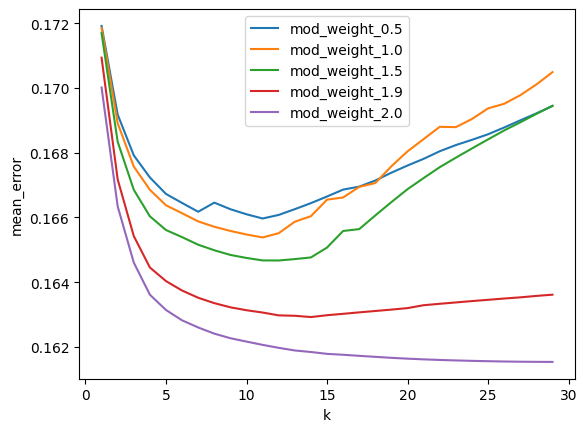

The optimal number of factors is: mod_weight_0.5    11
mod_weight_1.0    11
mod_weight_1.5    12
mod_weight_1.9    14
mod_weight_2.0    29
dtype: int64


In [ ]:
# from cp_utils import model_selection_alpha
# k = np.arange(1,30)
# mod_sel = model_selection_alpha(adata,k,random_state=random_state)

In [ ]:
import scanpy as sc

def find_leiden_resolution(
    adata,
    target_clusters=6,
    start_resolution=0.1,
    tolerance=0.01,
    max_iters=100,
    random_state=123,
    neighbors_key='cellpie',
    key_added='CellPie',
    use_rep = 'cellpie',
    
    n_neighbors=90
):
    """
    Finds the Leiden resolution resulting in approximately `target_clusters` clusters.
    
    Parameters:
    - adata: AnnData object.
    - target_clusters: The desired number of clusters.
    - start_resolution: Starting point for the resolution.
    - tolerance: Acceptable deviation from the target number of clusters.
    - max_iters: Maximum number of iterations.
    - random_state: Seed for reproducibility.
    - neighbors_key: Key for storing the neighborhood graph.
    - key_added: Key in `adata.obs` where the Leiden clusters are stored.
    - use_rep: Representation to use for neighbor graph calculation.
    
    Returns:
    - final_resolution: The resolution that yields approximately `target_clusters` clusters.
    - cluster_counts: Number of clusters at each tested resolution.
    """
    resolution = start_resolution
    step = 0.01  # Step size for adjusting the resolution
    cluster_counts = []
    
    # Compute the neighborhood graph based on the specified representation
    sc.pp.neighbors(adata, n_neighbors= n_neighbors, random_state=random_state, use_rep=use_rep, key_added=neighbors_key)
    
    for i in np.arange(start_resolution,1.01,step):
        # Run Leiden clustering
        sc.tl.leiden(adata, resolution=i, random_state=random_state, neighbors_key=neighbors_key, key_added=key_added)
        
        # Count the clusters
        n_clusters = adata.obs[key_added].nunique()
        cluster_counts.append((resolution, n_clusters))
        
        # Check if we reached the target cluster count within tolerance
        if abs(n_clusters - target_clusters) <= tolerance:
            print(f"Found resolution: {i} with {n_clusters} clusters")
            return 
        else:
            continue

In [ ]:
res_1 = []
for i in np.arange(0, 2.01,0.1):
    nmf_model = intNMF(adata,12,epochs = 50, init = 'nndsvd',random_state=random_state,mod1_skew=i)
    nmf_model.fit(adata)
    
    adata.obsm['cellpie'] = nmf_model.theta
    find_leiden_resolution(adata, target_clusters=6,neighbors_key='cellpie',key_added='CellPie',use_rep='cellpie')    
    mut_info=metrics.fowlkes_mallows_score(adata.obs['CellPie'],adata.obs['Histology'])
    adj_rand=metrics.adjusted_rand_score(adata.obs['CellPie'],adata.obs['Histology'])
    adj_mut_info=metrics.adjusted_mutual_info_score(adata.obs['CellPie'],adata.obs['Histology'])
    res_1.append((i,mut_info,adj_rand,adj_mut_info)) 

In [ ]:
score_1 = pd.DataFrame(res_1)   
plt.plot(score_1[0],score_1[1],color="green",label='Fowlkes Mallows Score')
plt.plot(score_1[0],score_1[2],color="red",label='Adjusted Rand Index Score')
plt.plot(score_1[0],score_1[3],color="blue",label='Adjusted Mutual Info Score')
plt.xlabel("Modality weight")
plt.ylabel("Score")
plt.title("CellPie")
plt.legend(prop={'size': 9})

In [ ]:
nmf_model = intNMF(adata,12,epochs = 50,init = 'nndsvd',random_state=random_state,mod1_skew=1.8)
nmf_model.fit(adata)
adata.obsm['cellpie'] = nmf_model.theta

In [ ]:
sc.pp.neighbors(adata, n_neighbors= 90, random_state=random_state, use_rep='cellpie', key_added='cellpie')
# Run Leiden clustering
sc.tl.leiden(adata, resolution=0.319, random_state=random_state, neighbors_key='cellpie', key_added='CellPie')
n_clusters = adata.obs['CellPie'].nunique()

In [ ]:
n_clusters

In [ ]:
adj_rand=metrics.adjusted_rand_score(adata.obs['CellPie'],adata.obs['Histology'])
adj_rand

In [ ]:
adj_rand=metrics.adjusted_rand_score(adata.obs['CellPie'],adata.obs['Histology'])
adj_rand

In [ ]:
sc.pl.spatial(adata, color='CellPie',size=1.4)

In [ ]:
from sklearn.decomposition import FactorAnalysis
transformer = FactorAnalysis(n_components=22, random_state=random_state)
X_transformed = transformer.fit_transform(adata.X.toarray())
adata.obsm['FA'] = X_transformed

In [ ]:
sc.pp.neighbors(adata, n_neighbors= 90, random_state=random_state, use_rep='FA', key_added='fa')
sc.tl.leiden(adata, resolution=0.37, random_state=random_state, neighbors_key='fa', key_added='fa')

In [ ]:
nmf_model_0 = intNMF(adata,12,epochs = 50,init = 'nndsvd',random_state=random_state,mod1_skew=2)
nmf_model_0.fit(adata)
adata.obsm['cellpie_0'] = nmf_model_0.theta
sc.pp.neighbors(adata, n_neighbors=90, random_state=random_state, use_rep='cellpie_0', key_added='cellpie_0')
sc.tl.leiden(adata, resolution=0.13, random_state=random_state, neighbors_key='cellpie_0', key_added='CellPie_0')

In [ ]:
mef = pd.read_csv(f'../range_benchmark/factors_mefisto_prostate_30_bench.csv',index_col=0)
mef_aligned = mef.reindex(adata.obs.index)
adata.obsm['mefisto'] = mef_aligned
sc.pp.neighbors(adata, n_neighbors= 90, random_state=random_state, use_rep='mefisto', key_added='mefisto')
sc.tl.leiden(adata, resolution=0.35, random_state=random_state, neighbors_key='mefisto', key_added='MEFISTO')

In [ ]:
nsf = pd.read_csv(f'../range_benchmark/factors_nsf_prostate_poi_32_bench.csv',index_col=0)
nsf_aligned = nsf.reindex(adata.obs.index)
adata.obsm['nsf'] = nsf_aligned
sc.pp.neighbors(adata, n_neighbors= 90, random_state=random_state, use_rep='nsf', key_added='nsf')
sc.tl.leiden(adata, resolution=0.36, random_state=random_state, neighbors_key='nsf', key_added='nsf')

In [ ]:
nsfh_s = pd.read_csv(f'../range_benchmark/spatialfactors_nsfh_prostate_poi_15_bench.csv',index_col=0)

nsfh_ns = pd.read_csv(f'../range_benchmark/nonspatialfactors_nsfh_prostate_poi_15_bench.csv',index_col=0)
nsfh = pd.concat([nsfh_ns,nsfh_s], axis=1)
    

nsfh_aligned = nsfh.reindex(adata.obs.index)
adata.obsm['nsfh'] = nsfh_aligned
sc.pp.neighbors(adata, n_neighbors= 90, random_state=random_state, use_rep='nsfh', key_added='nsfh')
sc.tl.leiden(adata, resolution=0.33, random_state=random_state, neighbors_key='nsfh', key_added='NSFH')

In [ ]:
pnmf = pd.read_csv(f'../range_benchmark/factors_pnmf_prostate_poi_22_bench.csv',index_col=0)

pnmf_aligned = pnmf.reindex(adata.obs.index)
adata.obsm['pnmf'] = pnmf_aligned

sc.pp.neighbors(adata, n_neighbors= 90, random_state=random_state, use_rep='pnmf', key_added='pnmf')
sc.tl.leiden(adata, resolution=0.37, random_state=random_state, neighbors_key='pnmf', key_added='PNMF')

In [ ]:
adata.uns['CellPie_colors'] = ['#1f77b4','#2ca02c','#8c564b','#00e6e6','#ff7f0e','#9467bd']
adata.uns['nsf_colors'] = ['#1f77b4', '#ff7f0e','#00e6e6', '#2ca02c', '#8c564b','#9467bd']
adata.uns['NSFH_colors'] = ['#1f77b4','#ff7f0e','#8c564b','#00e6e6','#2ca02c','#7f7f7f']
adata.uns['MEFISTO_colors'] = ['#1f77b4','#ff7f0e','#00e6e6','#8c564b','#2ca02c','#9467bd']
adata.uns['fa_colors'] = ['#1f77b4','#ff7f0e', '#2ca02c','#8c564b','#2ba02c','#9467bd']
adata.uns['PNMF_colors'] = ['#ff7f0e','#1f77b4','#00e6e6','#8c564b','#a93226','#9467bd']
adata.uns['CellPie_0_colors'] = ['#1f77b4','#1f77b4', '#2ca02c','#00e6e6','#ff7f0e','#7f7f7f']

In [ ]:
sc.pl.spatial(adata,color=['Histology','CellPie','nsf','NSFH','MEFISTO','fa','PNMF','CellPie_0'],
              size=1.4, ncols = 1 
             )

In [ ]:
from sklearn import metrics
l_t = ['CellPie','nsf','NSFH','MEFISTO','fa','PNMF','CellPie_0']
res_all = []
for l_t in l_t:
    mut_info=metrics.fowlkes_mallows_score(adata.obs[l_t],adata.obs['Histology'])
    adj_rand=metrics.adjusted_rand_score(adata.obs[l_t],adata.obs['Histology'])
    adj_mut_info=metrics.adjusted_mutual_info_score(adata.obs[l_t],adata.obs['Histology'])
    res_all.append((l_t,mut_info,adj_rand,adj_mut_info))
res_df = pd.DataFrame(res_all, columns = ['Method','Mutual Info','Adjusted Rand Index','Adjusted Mutual Info'])

In [ ]:
res_df

In [ ]:
import seaborn as sns
plot=sns.barplot(data=res_df,x = res_df['Method'],y='Adjusted Rand Index',hue='Adjusted Rand Index',width=0.6, legend=False)
plot.set_xticklabels(plot.get_xticklabels(), fontsize=10)
plt.title('ARI-Leiden Clustering')
plt.grid(False)

In [ ]:
methods = ['CellPie', 'nsf','NSFH','PNMF','fa','MEFISTO', 'CellPie_0']

for i in methods:
    plt.figure(figsize=(12, 8))
    sns.heatmap(
        pd.crosstab(
           adata.obs['Histology'].values, adata.obs[f'{i}'].values,
            normalize ='index'
        ), annot_kws={'size': 25},
        cmap=sns.color_palette("crest", as_cmap=True),
        annot = True
    )
    plt.title(f'Contingency Table {i}')
    plt.grid(False)
    plt.show()

In [ ]:
k = 12

In [ ]:
from re import sub
import matplotlib as mpl
sel_clust = ['Factor_'+str(i+1) for i in range(k)]
with mpl.rc_context({'figure.figsize': (5, 6), 'axes.facecolor': 'black'}):
    sc.pl.spatial(adata,
                cmap='magma',
                color=sel_clust,
                ncols=4,
                size=1, img_key='hires',
                alpha_img=0,                   
                 )

In [ ]:
adata.obs['CellPie_str'] = adata.obs['CellPie']
adata.obs['CellPie_str']=adata.obs['CellPie_str'].replace({'4': 'Gleason 3'})
adata.obs['CellPie_str']=adata.obs['CellPie_str'].replace({'1': 'Gleason 4'})    

adata.obs['nsf_str'] = adata.obs['nsf']
adata.obs['nsf_str']=adata.obs['nsf_str'].replace({'1': 'Gleason 3'})
adata.obs['nsf_str']=adata.obs['nsf_str'].replace({'3': 'Gleason 4'})    

adata.obs['nsfh_str'] = adata.obs['NSFH']
adata.obs['nsfh_str']=adata.obs['nsfh_str'].replace({'1': 'Gleason 3'})
adata.obs['nsfh_str']=adata.obs['nsfh_str'].replace({'4': 'Gleason 4'})    

adata.obs['pnmf_str'] = adata.obs['PNMF']
adata.obs['pnmf_str']=adata.obs['pnmf_str'].replace({'0': 'Gleason 3'})
adata.obs['pnmf_str']=adata.obs['pnmf_str'].replace({'0': 'Gleason 4'})    

adata.obs['mefisto_str'] = adata.obs['MEFISTO']
adata.obs['mefisto_str']=adata.obs['mefisto_str'].replace({'1': 'Gleason 3'})
adata.obs['mefisto_str']=adata.obs['mefisto_str'].replace({'4': 'Gleason 4'})   

adata.obs['fa_str'] = adata.obs['fa']
adata.obs['fa_str']=adata.obs['fa_str'].replace({'1': 'Gleason 3'})
adata.obs['fa_str']=adata.obs['fa_str'].replace({'2': 'Gleason 4'})   

In [ ]:
from sklearn.metrics import f1_score
f1_cp = f1_score(adata.obs['Histology'],adata.obs['CellPie_str'],labels=['Gleason 3','Gleason 4'],average='macro')
f1_nsf = f1_score(adata.obs['Histology'],adata.obs['nsf_str'],labels=['Gleason 3','Gleason 4'],average='micro')
f1_nsfh =f1_score(adata.obs['Histology'],adata.obs['nsfh_str'],labels=['Gleason 3','Gleason 4'],average='micro')
f1_mef = f1_score(adata.obs['Histology'],adata.obs['mefisto_str'],labels=['Gleason 3','Gleason 4'],average='micro')
f1_pnmf = f1_score(adata.obs['Histology'],adata.obs['pnmf_str'],labels=['Gleason 3','Gleason 4'],average='micro')
f1_fa = f1_score(adata.obs['Histology'],adata.obs['fa_str'],labels=['Gleason 3','Gleason 4'],average='micro')

In [ ]:
f1 = [f1_cp,f1_nsf,f1_nsfh,f1_mef,f1_pnmf,f1_fa]
f1_df = pd.DataFrame(f1,columns=['f1'])
f1_df['Method'] = ['CellPie','NSF','NSFH','MEFISTO','PNMF','FA']

In [ ]:
import seaborn as sns
plot=sns.barplot(data=f1_df,y = f1_df['f1'],x=f1_df['Method'],width=0.6,hue='f1',legend=False)
plot.set_xticklabels(plot.get_xticklabels(), fontsize=10)
plt.title('F1 Score for Gleason 3 and Gleason 4 labels')
plt.grid(False)

In [ ]:
adata

In [ ]:
import gseapy as gp
def gene_er(topic):
    enr = gp.enrichr(gene_list=topic,
                gene_sets=['GO_Biological_Process_2023'],cutoff = 0.6,
                organism='human', 
                outdir=None,
                )
    return enr

In [ ]:
l=cp.get_genes_topic(adata,nmf_model.phi_expr)
enr0 = gene_er(l.T[0].sort_values(ascending=False).index[0:150].to_list())
enr1 = gene_er(l.T[1].sort_values(ascending=False).index[0:150].to_list())
enr2 = gene_er(l.T[2].sort_values(ascending=False).index[0:150].to_list())
enr3 = gene_er(l.T[3].sort_values(ascending=False).index[0:150].to_list())
enr4 = gene_er(l.T[4].sort_values(ascending=False).index[0:150].to_list())
enr5 = gene_er(l.T[5].sort_values(ascending=False).index[0:150].to_list())
enr6 = gene_er(l.T[6].sort_values(ascending=False).index[0:150].to_list())
enr7 = gene_er(l.T[7].sort_values(ascending=False).index[0:150].to_list())
enr8= gene_er(l.T[8].sort_values(ascending=False).index[0:150].to_list())
enr9 = gene_er(l.T[9].sort_values(ascending=False).index[0:150].to_list())
enr10 = gene_er(l.T[10].sort_values(ascending=False).index[0:150].to_list())
enr11 = gene_er(l.T[11].sort_values(ascending=False).index[0:150].to_list())

In [ ]:
gp.barplot(enr0.res2d,title='GO_Biological_Process_2023 Factor 1',color=['darkred'])
plt.grid(None)

In [ ]:
gp.barplot(enr1.res2d,title='GO_Biological_Process_2023 Factor 2',color=['darkred'])
plt.grid(None)

In [ ]:
gp.barplot(enr2.res2d,title='GO_Biological_Process_2023 Factor 3',color=['darkred'])
plt.grid(None)

In [ ]:
gp.barplot(enr3.res2d,title='GO_Biological_Process_2023 Factor 4',color=['darkred'])
plt.grid(None)

In [ ]:
gp.barplot(enr4.res2d,title='GO_Biological_Process_2023 Factor 5',color=['darkred'])
plt.grid(None)

In [ ]:
gp.barplot(enr5.res2d,title='GO_Biological_Process_2023 Factor 6',color=['darkred'])
plt.grid(None)

In [ ]:
gp.barplot(enr6.res2d,title='GO_Biological_Process_2023 Factor 7',color=['darkred'])
plt.grid(None)

In [ ]:
gp.barplot(enr7.res2d,title='GO_Biological_Process_2023 Factor 8',color=['darkred'])
plt.grid(None)

In [ ]:
gp.barplot(enr8.res2d,title='GO_Biological_Process_2023 Factor 9',color=['darkred'])
plt.grid(None)

In [ ]:
gp.barplot(enr9.res2d,title='GO_Biological_Process_2023 Factor 10',color=['darkred'])
plt.grid(None)

In [ ]:
gp.barplot(enr10.res2d,title='GO_Biological_Process_2023 Factor 11',color=['darkred'])
plt.grid(None)

In [ ]:
gp.barplot(enr11.res2d,title='GO_Biological_Process_2023 Factor 12',color=['darkred'])
plt.grid(None)